EARTHQUAKE VISUAL ANALYSIS USING MATPLOTLIB

In [1]:
##Importing Libraries and Dataset
##Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.
##Pandas helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go
##Matplotlib/Seaborn is used to draw visualizations as graph
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading the dataset into the panda’s data frame for analysis it will display all the columns with five rows
df= pd.read_csv("all_month.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,1.02,ml,15.0,101.0,0.1713,0.15,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.33,0.80,0.144,12.0,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,1.89,md,32.0,33.0,NaN,0.02,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.17,0.33,0.180,34.0,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,ml,NaN,NaN,NaN,0.50,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,md,31.0,117.0,NaN,0.19,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.68,0.94,1.790,14.0,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,ml,NaN,NaN,NaN,0.13,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak


In [3]:
#to find out how many rows our data contains.
len(df)

9410

In [4]:
df.shape ##dimension of dataset

(9410, 22)

df.shape helps us to understant dimension of data set and we came to know it has 9410 rows and 22 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9410 entries, 0 to 9409
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9410 non-null   object 
 1   latitude         9410 non-null   float64
 2   longitude        9410 non-null   float64
 3   depth            9410 non-null   float64
 4   mag              9409 non-null   float64
 5   magType          9409 non-null   object 
 6   nst              6823 non-null   float64
 7   gap              6822 non-null   float64
 8   dmin             5053 non-null   float64
 9   rms              9410 non-null   float64
 10  net              9410 non-null   object 
 11  id               9410 non-null   object 
 12  updated          9410 non-null   object 
 13  place            9410 non-null   object 
 14  type             9410 non-null   object 
 15  horizontalError  6347 non-null   float64
 16  depthError       9410 non-null   float64
 17  magError      

In [6]:
df.columns.values

array(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'], dtype=object)

In [7]:
df.isnull().sum()  ##the number of missing values in the dataset

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2587
gap                2588
dmin               4357
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3063
depthError            0
magError           2665
magNst             2600
status                0
locationSource        0
magSource             0
dtype: int64

In [8]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9410.000000,9410.000000,9410.000000,9409.000000,6823.000000,6822.000000,5053.000000,9410.000000,6347.000000,9410.000000,6745.000000,6810.000000
mean,40.694347,-117.863831,25.593011,1.645013,23.403635,119.461838,0.747333,0.294069,1.698991,2.083547,0.276723,15.534655
std,20.430642,66.380624,54.697555,1.230108,22.145048,62.376305,2.697378,0.276421,3.095408,15.786392,0.477658,23.290696
min,-65.407100,-179.973800,-3.330000,-1.120000,0.000000,14.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.431417,-154.926417,2.972500,0.890000,9.000000,70.000000,0.014850,0.090000,0.260000,0.420000,0.110000,5.000000
50%,38.830166,-122.852837,9.125811,1.430000,17.000000,106.000000,0.063090,0.176600,0.440000,0.710000,0.169000,9.000000
75%,58.247167,-116.722042,25.296000,2.100000,31.000000,157.000000,0.196200,0.470000,0.860000,1.400000,0.248000,18.000000
max,82.000600,179.944100,635.507000,7.600000,289.000000,352.540000,56.433000,2.000000,23.780000,1350.300000,5.190000,768.000000


The above output helps us to conclude that the maximum magnitude is 7.6 and maximum depth is 635.50

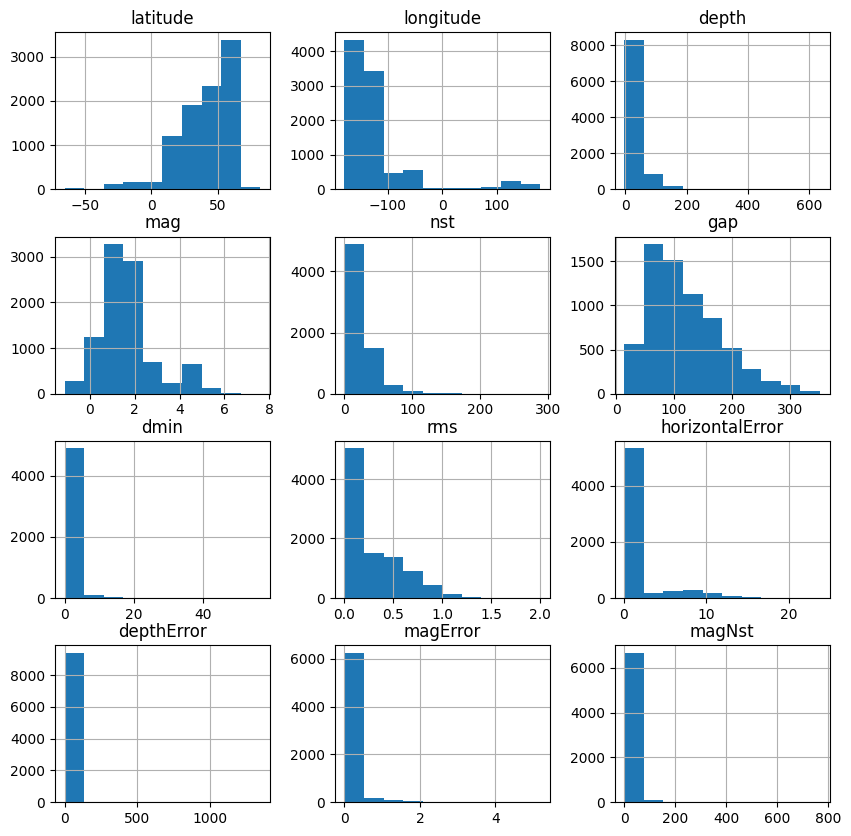

In [9]:
## plot an histogram
df.hist(bins= 10, figsize=(10,10))
plt.show()
## histogram can be skewed -- positively skewed, goes towards the right positively skewed
## mean is not affected by outliers, median is affected well b y outliers

In [10]:
#to check frequency of all earthquake
freq = df['mag'].value_counts()
freq

 1.40    279
 1.60    277
 1.50    266
 1.70    227
 1.30    207
        ... 
 3.72      1
 3.67      1
-0.85      1
 3.75      1
 2.78      1
Name: mag, Length: 577, dtype: int64

Text(0, 0.5, 'frequency')

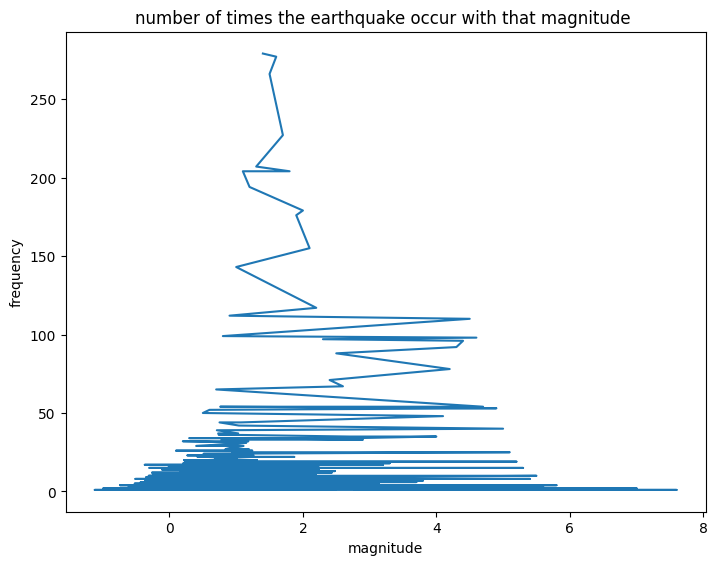

In [11]:
#plot the frequewncy
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
ax.plot(freq)

ax.set_title("number of times the earthquake occur with that magnitude ")
ax.set_xlabel("magnitude")
ax.set_ylabel("frequency")


from above graph its evident that lesser magnitude earthquake are more frequent, mag <3 have more frequency while mag>6 are only few

Text(0, 0.5, 'magnitude')

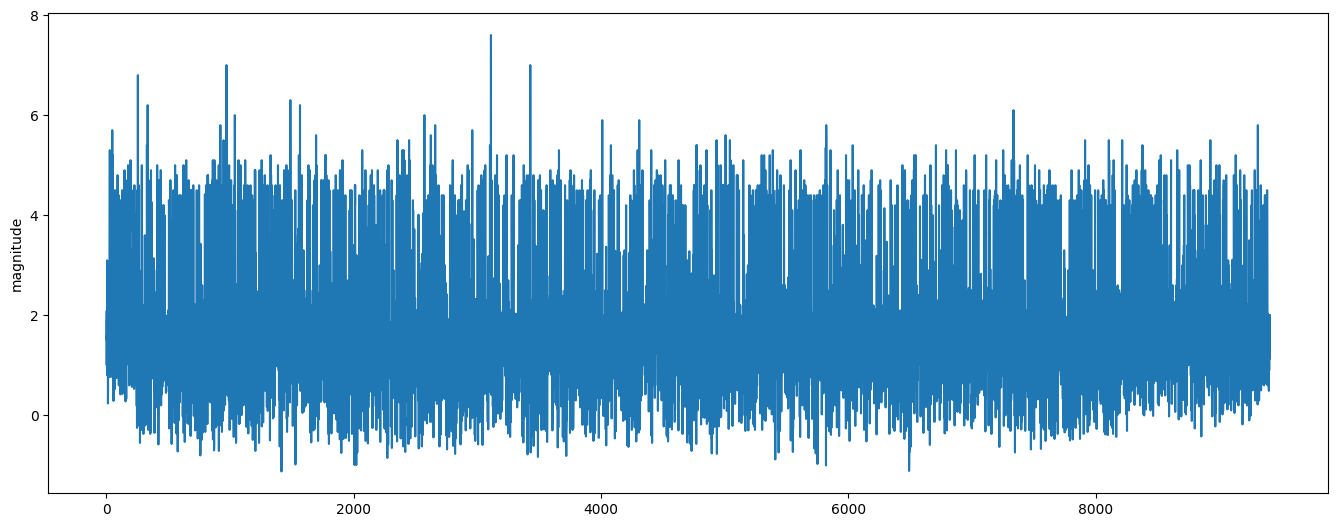

In [12]:
#plot each magnitude in cv file
fig = plt.figure()
ax = fig.add_axes([.1, .1, 2, 1])
ax.plot(df['mag'])
ax.set_ylabel("magnitude")

It is shown here that around 6 earthquakes have a magnitude more than 6 in the richter scale.

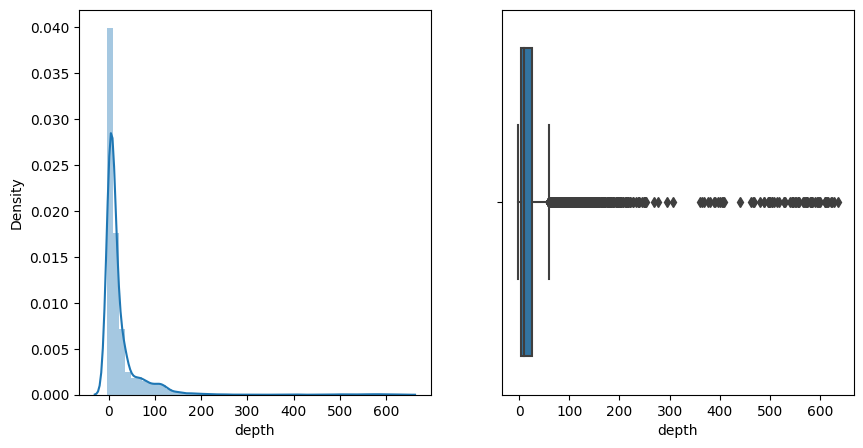

In [13]:
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['depth'])
plt.subplot(1, 2, 2)
sns.boxplot(x=df["depth"])
plt.show()

From the distribution graph above, it is evident that there are some outliers that can be confirmed by using the boxplot. and it is observe that the distribution of the depth at which the earthquake rises is left-skewed.ie: mostly are towards lower range of less than 50

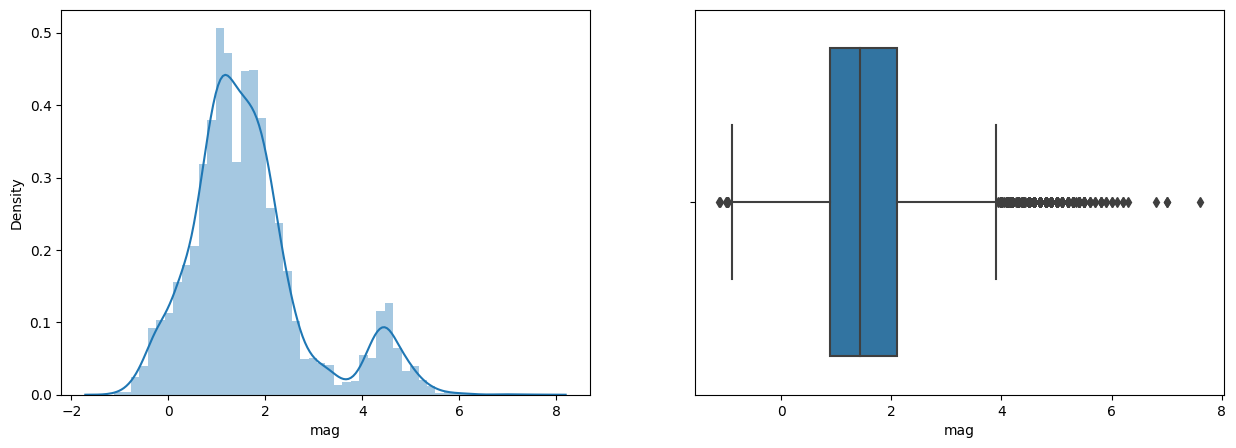

In [14]:

plt.subplots(figsize=(15, 5))
 
plt.subplot(1, 2, 1)
sns.distplot(df['mag'])
 
plt.subplot(1, 2, 2)
sns.boxplot(x=df["mag"])
 
plt.show()

from above graph it is observe that the magnitude of the earthquake follows a normal distribution like any natural phenomenon.

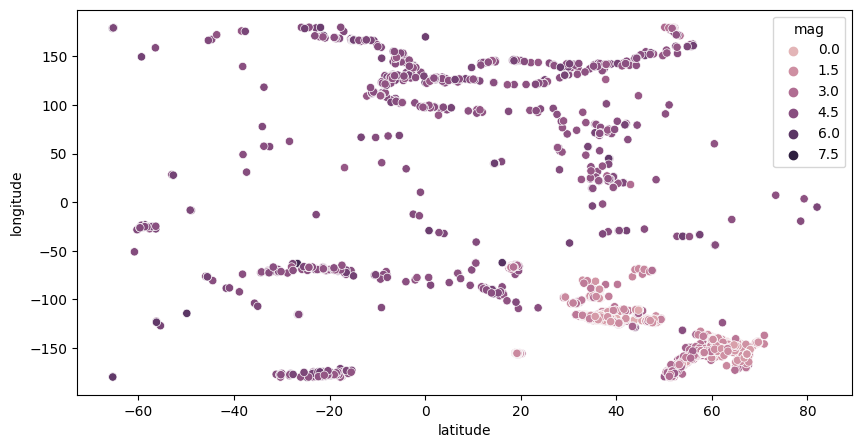

In [15]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df,
               x='latitude',
               y='longitude',
               hue='mag')
plt.show()

scatter plot makes it more evident that majority earthquake are less than 3.0 magnitude

We are using Feature Engineering to derive some valuable features from the existing data. These help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data. thus we separated the time column to two different column using date and time.

In [16]:
splitted = df['time'].str.split('T', n=1,
                                      expand=True)
 
df['Date'] = splitted[0]
df['Time'] = splitted[1].str[:-4]
 
df.drop('time',
        axis=1,
        inplace=True)
df.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Date,Time
0,35.504500,-118.392667,3.86,1.02,ml,15.0,101.0,0.1713,0.15,ci,...,earthquake,0.33,0.80,0.144,12.0,automatic,ci,ci,2023-01-22,02:21:07.
1,38.824833,-122.801666,2.55,1.89,md,32.0,33.0,NaN,0.02,nc,...,earthquake,0.17,0.33,0.180,34.0,automatic,nc,nc,2023-01-22,01:57:03.
2,64.627100,-150.159800,12.40,1.90,ml,NaN,NaN,NaN,0.50,ak,...,earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak,2023-01-22,01:56:26.
3,19.259832,-155.420502,29.02,2.09,md,31.0,117.0,NaN,0.19,hv,...,earthquake,0.68,0.94,1.790,14.0,automatic,hv,hv,2023-01-22,01:53:47.
4,64.592500,-149.799600,18.00,1.50,ml,NaN,NaN,NaN,0.13,ak,...,earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak,2023-01-22,01:51:05.


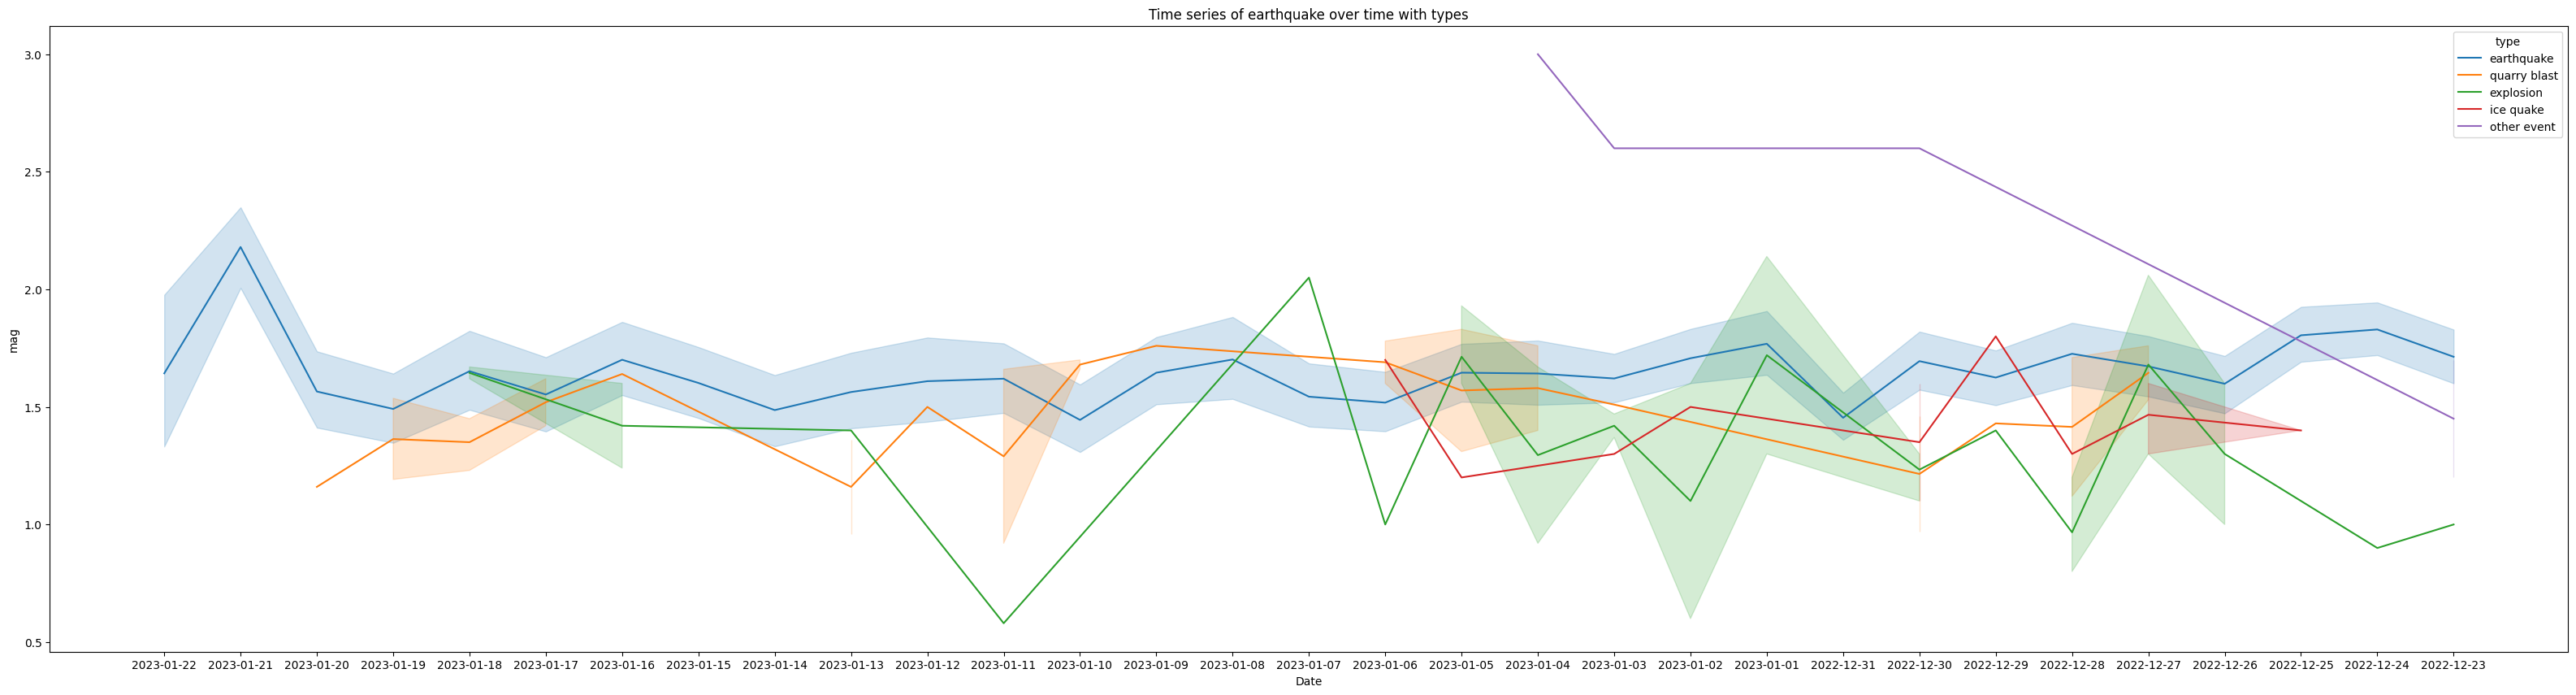

In [17]:
plt.figure(figsize=(40, 10))
sns.lineplot(data=df,
            x="Date",
            y="mag", hue="type")
plt.title('Time series of earthquake over time with types')
plt.show()

From above graph it is seen that higher frequency earthquake are caused by other events while others contribute to same effect

now we are splitting date to day month and year!!!

In [18]:
splitted = df['Date'].str.split('-', expand=True)
 
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
 
df.drop('Date', axis=1,
        inplace=True)
df.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,depthError,magError,magNst,status,locationSource,magSource,Time,day,month,year
0,35.504500,-118.392667,3.86,1.02,ml,15.0,101.0,0.1713,0.15,ci,...,0.80,0.144,12.0,automatic,ci,ci,02:21:07.,22,1,2023
1,38.824833,-122.801666,2.55,1.89,md,32.0,33.0,NaN,0.02,nc,...,0.33,0.180,34.0,automatic,nc,nc,01:57:03.,22,1,2023
2,64.627100,-150.159800,12.40,1.90,ml,NaN,NaN,NaN,0.50,ak,...,0.50,NaN,NaN,automatic,ak,ak,01:56:26.,22,1,2023
3,19.259832,-155.420502,29.02,2.09,md,31.0,117.0,NaN,0.19,hv,...,0.94,1.790,14.0,automatic,hv,hv,01:53:47.,22,1,2023
4,64.592500,-149.799600,18.00,1.50,ml,NaN,NaN,NaN,0.13,ak,...,0.30,NaN,NaN,automatic,ak,ak,01:51:05.,22,1,2023


Exploratory Data Analysis
EDA is a method to analyse the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

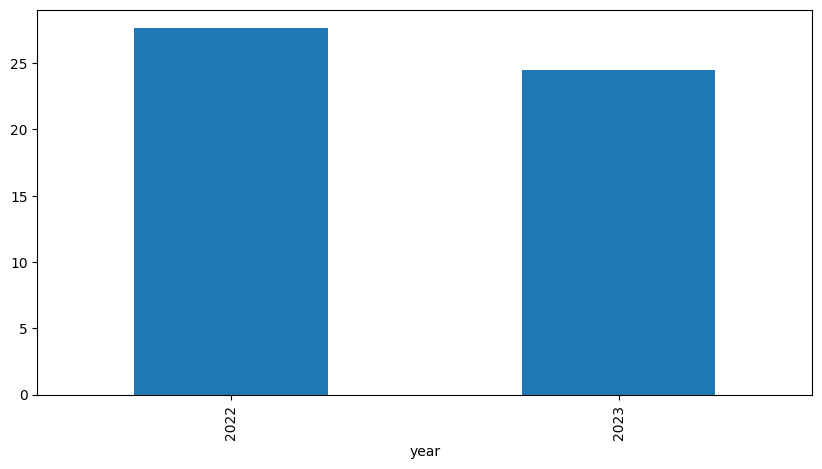

In [19]:
plt.figure(figsize=(10, 5))
x = df.groupby('year').mean()['depth']
x.plot.bar()
plt.show()

from the above graph we can observe that depth has decreased in 2023 compared to 2022

Now by using Plotly let’s plot the latitude and the longitude data on the map to visualize which areas are more prone to earthquakes.

In [20]:
import plotly.express as px
import pandas as pd
 
fig = px.scatter_geo(df, lat='latitude',
                     lon='longitude',
                     color='mag',
                     fitbounds='locations',
                     scope='world')
fig.show()

In [21]:
df['mag'] = df['mag'].fillna(df['mag'].mean())

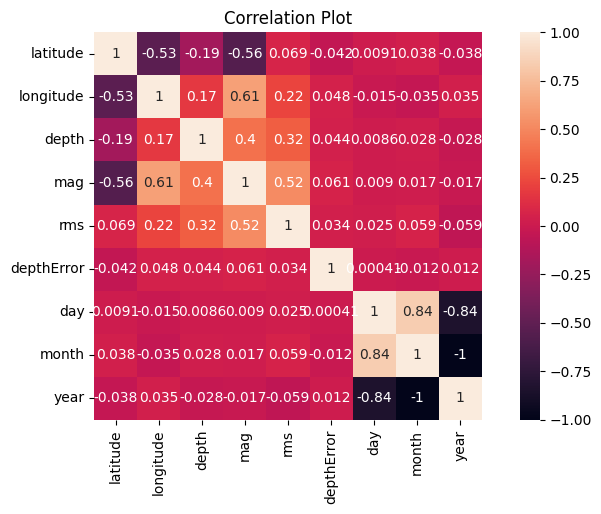

In [22]:
# Correlation matrix
df = df.dropna('columns') # drop columns with NaN
corr_mat = df.corr()
corr_mat

plt.figure(figsize=(10,5))
corrMat = plt.matshow(corr_mat, fignum = 1)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.gca().xaxis.tick_bottom()

sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Plot')
plt.show()